## MMSB: Beer Survey

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/all_our_ideas/2565/2565_dat.csv', header=None)
text = pd.read_csv('../data/all_our_ideas/2565/2565_text_map.csv', header=None)[1]
data.head()

,0,1,2,3
0,2,5,0,749d8459047a7c024738d643524b889a
1,11,20,0,0cdd2260af00904baedc94baa0050fd6
2,2,19,1,f933c71f15dfb64842fd9832e3734ad4
3,4,11,1,f933c71f15dfb64842fd9832e3734ad4
4,9,20,0,0cdd2260af00904baedc94baa0050fd6


In [40]:
data = data[data[3] == '1bc8052fc357986cea6bf530ff4d5d3a'] # Most prolific user

In [41]:
X = data[[0,1,2]].values
X.shape

(1244, 3)

In [42]:
V = max(X[:,1]) + 1
V

27

In [94]:
I = pd.DataFrame(utils.get_interactions(X, V))

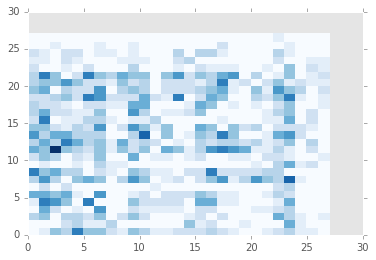

In [48]:
plt.pcolor(I, cmap='Blues')

## Tests

0:00:03.438850


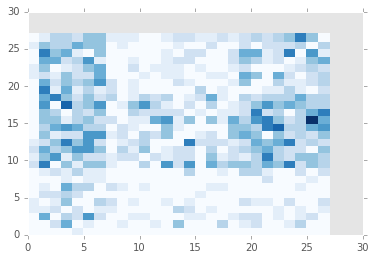

In [114]:
K = 3
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=400)
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

In [115]:
gamma_df = pd.DataFrame(gamma.T, index=text.apply(lambda x: x[:50]))

In [120]:
gamma_df[0].sort_values(ascending=False).iloc[:10]

1
Stone "Arrogant Bastard" Ale             0.998234
BLUE MOON                                0.998063
Something with a high alcohol content    0.997833
Bear Republic "Racer 5" IPA              0.997785
Something dark and chocolatey            0.997708
Blue Moon                                0.991766
Guinness                                 0.983737
Anything Flying Dog                      0.538274
New Belgium "1554"                       0.483893
Sierra Nevada "Summerfest"               0.191328
Name: 0, dtype: float64

In [121]:
gamma_df[1].sort_values(ascending=False).iloc[:10]

1
A stout of any sort                0.998135
New Belgium "Mothership"           0.998063
New Belgium "Fat Tire"             0.997944
Kingman homebrew :)                0.997878
A porter of any sort               0.997760
a barrel of red wine               0.849082
Sierra Nevada "Summerfest"         0.807565
Something local and microbrewey    0.788907
An ale of any sort                 0.745175
Sierra Nevada Pale Ale             0.676898
Name: 1, dtype: float64

In [122]:
gamma_df[2].sort_values(ascending=False).iloc[:10]

1
PBR                                                 0.998170
Stone "Ruination" IPA                               0.998170
Old Rasputin- Imperial Stout                        0.998118
Lagunitas Undercover Investigation Shut-Down Ale    0.998100
Stellaaaaaa                                         0.998005
An IPA of any sort                                  0.997901
Leffe (belgian blonde ale)                          0.894313
New Belgium "1554"                                  0.515046
Anything Flying Dog                                 0.460642
Everclear.                                          0.434469
Name: 2, dtype: float64

In [125]:
pd.DataFrame(B).round(2)

,0,1,2
0,0.50,0.09,0.12
1,0.91,0.50,0.91
2,0.88,0.09,0.50
